In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# ATI Data Analysis 
The goal of this analysis is to see how arrests changed from pre-pandemic to post pandemic. 

In [3]:
ati_data = pd.read_csv('X:\CJ\County Alternatives to Incarceration (23542)\Data\Goal 1 Research Analysis\ATI_address_data.csv')

In [ ]:
# Shorten data to have only columns that I will be using 
mini_ati_data = ati_data[['BOOKNUM', 'book_dt', 'arrest_type_code', 'arrest_type_descrip', 'arrest_agency_code', 'LOCATION_OF_ARREST', 'offense_section', 'offense_description', 'Offense_code', 'offense_severity']]

# Turn date into a datetime object
mini_ati_data['book_dt']= pd.to_datetime(mini_ati_data['book_dt'])

C:\Users\cra\AppData\Local\Temp\ipykernel_27872\2829858898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_ati_data['book_dt']= pd.to_datetime(mini_ati_data['book_dt'])


# Agencies where covid had the biggest effect on booking numbers
This is an analysis of which agencies had the biggest percentage change in booknums do to the pandemic. 


In [ ]:
codes = pd.pivot_table(mini_ati_data, values='BOOKNUM', index=['arrest_agency_code'], columns=['book_dt'], aggfunc=lambda x: len(x.unique())).transpose()
booknum_aggs = codes.reset_index().groupby(pd.Grouper(key='book_dt', freq='M')).sum() # Change'freq' to look at differnt levels

I am now going to look at only agencies that were doing more than 20 arrests per month. The reason for this is any numbers smaller than that will have unusually large percent differences. I will do this analysis by taking the average values for each depatment over 2018 and 2019 then find the percent difference for each of the months in 2020 and 2021. 

In [ ]:
prac = booknum_aggs[booknum_aggs>20]
book_vals = prac.dropna(axis=1, thresh=36) # Requires at least 36 non-na values
# Find average per month over 2018 and 2019
averages = pd.DataFrame(book_vals.loc['2018':'2019'].mean(axis = 0)).transpose()
post_covid = book_vals.loc['2020':'2021']

Below is a dataframe that shows the percent difference of number of booking numbers from pre-covid levels to the month in question. Here I am defining precovid levels as the average values of the years 2018 and 2019. 

In [ ]:
# Percent difference from pre-covid values
pct_diff = post_covid.sub(list(averages.loc[0]), axis=1).div(list(averages.loc[0]), axis=1).mul(100)

Text(0.5, 1.0, 'Percent Difference from Pre-Covid Averages')

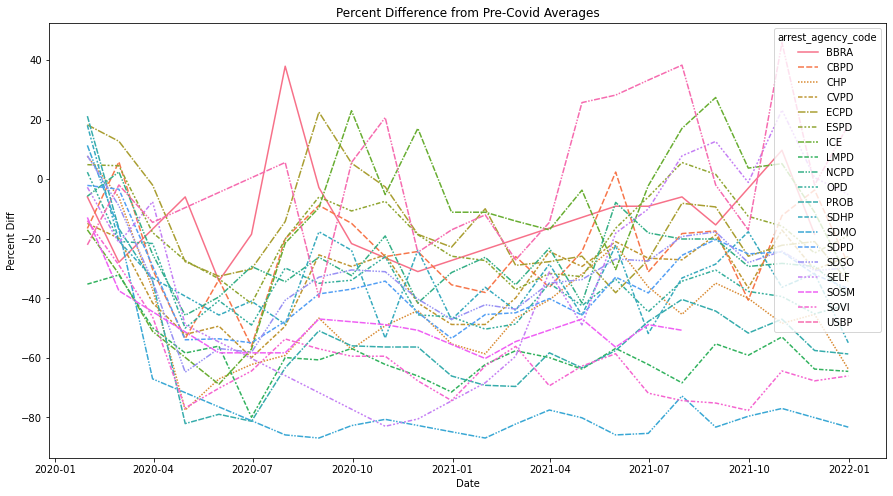

In [ ]:
# From the graph is can be seen that SDMO got really affected by covid
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=pct_diff)
ax.set_xlabel('Date')
ax.set_ylabel('Percent Diff')
ax.set_title('Percent Difference from Pre-Covid Averages')

# Looking at arrest severity over time

In [ ]:
# Finding severity broken down 
severity_df = pd.pivot_table(mini_ati_data, values='Offense_code', index=['book_dt'], columns=['offense_severity'], aggfunc=lambda x: len(x))
severity_df = severity_df.drop([' ', 'C'], axis=1) # Dropping the blanks and C, dropping C because there are 1,416 NaN points

In [ ]:
# Grouping by Month
severity_aggs = severity_df.reset_index().groupby(pd.Grouper(key='book_dt', freq='M')).sum()

In [ ]:
# Find average per month over 2018 and 2019
severity_averages = pd.DataFrame(severity_aggs.loc['2018':'2019'].mean(axis = 0)).transpose()
severity_post_covid = severity_aggs.loc['2020':'2021']

In [ ]:
# Percent difference from pre-covid values
severity_pct_diff = severity_post_covid.sub(list(severity_averages.loc[0]), axis=1).div(list(severity_averages.loc[0]), axis=1).mul(100)

Text(0.5, 1.0, 'Severity Percent Difference from Pre-Covid Averages')

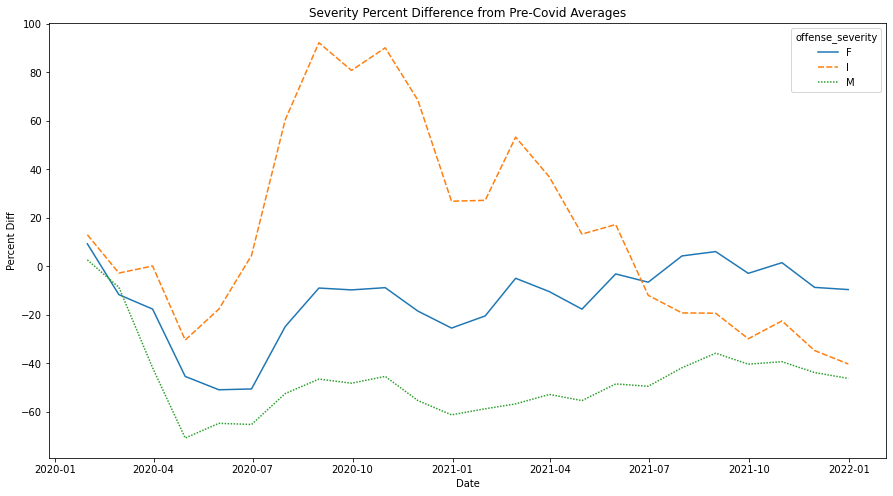

In [ ]:
# Severity I appears to have really increased since covid
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=severity_pct_diff)
ax.set_xlabel('Date')
ax.set_ylabel('Percent Diff')
ax.set_title('Severity Percent Difference from Pre-Covid Averages')

In [ ]:
mini_ati_data

,BOOKNUM,book_dt,arrest_type_code,arrest_type_descrip,arrest_agency_code,LOCATION_OF_ARREST,offense_section,offense_description,Offense_code,offense_severity
0,18100002,2018-01-01,ARST,FIELD ARREST,SOVI,BEAT 306,23152(A) VC,DUI ALCOHOL/DRUGS,VC,M
1,18100003,2018-01-01,ARST,FIELD ARREST,SDPD,4200 UTAH ST SAN DIEGO/813,647(F) PC,DISORD CONDUCT:PUBLIC INTOXICATION,PC,M
2,18100004,2018-01-01,ARST,FIELD ARREST,SDSO,16925 VASQUEZ WAY,243(E)(1) PC,BAT:SPOUSE/EX SP/DATE/ETC,PC,M
3,18100004,2018-01-01,ARST,FIELD ARREST,SDSO,16925 VASQUEZ WAY,422 PC,THREAT CRIME CAUSE DEATH/GBI,PC,F
4,18100004,2018-01-01,ARST,FIELD ARREST,SDSO,16925 VASQUEZ WAY,594(B)(2)(A),MISD VANDLISM,PC,M
...,...,...,...,...,...,...,...,...,...,...
687883,21150782,2021-12-30,BRMD,BOOKED-REMAND,SDSO,CUSTODY,11364 HS,CNTL SUB PARAPHENALIA,HS,M
687884,21150782,2021-12-30,BRMD,BOOKED-REMAND,SDSO,CUSTODY,11377(A) HS,POSS NON-NARC DRUG/CONT SUB,HS,M
687885,21150782,2021-12-30,BRMD,BOOKED-REMAND,SDSO,CUSTODY,11350(A) HS,POSSESS NARCOTIC CNTL SUB,HS,M
687886,21150782,2021-12-30,BRMD,BOOKED-REMAND,SDSO,CUSTODY,11364 HS,CNTL SUB PARAPHENALIA,HS,M


# Guestimating the number of people arrested for an individual booking number

In [ ]:
num_people = pd.DataFrame(index=set(list(mini_ati_data['BOOKNUM'])))
num_people['People Guestimate'] = " "

In [ ]:
for booknum in set(list(mini_ati_data['BOOKNUM'])):
    df = mini_ati_data[mini_ati_data['BOOKNUM']==mini_ati_data]
    offenses = list(df['offense_description'])
    max_offence_val = Counter(offenses).most_common(1)[0][1]
    num_people['People Guestimate'][18134132] = max_offence_val
    del df

C:\Users\cra\AppData\Local\Temp\ipykernel_27872\1043068490.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = mini_ati_data[mini_ati_data['BOOKNUM']==mini_ati_data]


MemoryError: Unable to allocate 3.44 TiB for an array with shape (687888, 687888) and data type float64

In [ ]:
num_people